In [51]:
%load_ext autoreload
%autoreload 2

from sympy import *
from safe_region_utils import *
from symbolic_utils import *
init_printing()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
x, y = symbols("x y")

# Single Function Example

In [54]:
a = Symbol("a", real=True, nonzero=True)
b = Symbol("b", real=True, nonzero=True)
c = Symbol("c", real=True, nonzero=True)

w = Symbol("w", real=True, positive=True, nonzero=True)
square_points: list = [
    geometry.Point(val) for val in [[w, -w], [w, w], [-w, w], [-w, -w]]
]
square_param: geometry.Polygon = Polygon(*square_points)
square_num: geometry.Polygon = Polygon(*square_points).subs(w, 1)

domain = Interval(-12, 9)
xbounds = [-15, 12]
ybounds = [-3, 6]
example_name = "Symbolic parabola"

traj = a*x**2 + b*x +c
traj

In [55]:
import time

In [56]:
t0 = time.time()
cond = compute_unsafe_cond_symbolic(
    x,
    y,
    square_num,
    traj,
    Reals,
    add_notches=True,
)
print(f"{time.time() - t0}")
cond

0.20006012916564941


                                                                                                        
⎛               ⎛    ⎛⎧               2                            ⎞    ⎞ ⎛    ⎛⎧               2       
⎜               ⎜    ⎜⎪              b                           b ⎟    ⎟ ⎜    ⎜⎪              b        
⎜          b    ⎜    ⎜⎪         c - ───            for x < -1 - ───⎟    ⎟ ⎜    ⎜⎪         c - ───       
⎜x ≥ -1 - ─── ∧ ⎜y - ⎜⎨             4⋅a                         2⋅a⎟ - 1⎟⋅⎜y - ⎜⎨             4⋅a       
⎜         2⋅a   ⎜    ⎜⎪                                            ⎟    ⎟ ⎜    ⎜⎪                       
⎜               ⎜    ⎜⎪         2                                  ⎟    ⎟ ⎜    ⎜⎪         2             
⎝               ⎝    ⎝⎩a⋅(x + 1)  + b⋅(x + 1) + c     for x ≤ ∞    ⎠    ⎠ ⎝    ⎝⎩a⋅(x - 1)  + b⋅(x - 1) 
                                                                                                        

                                                      

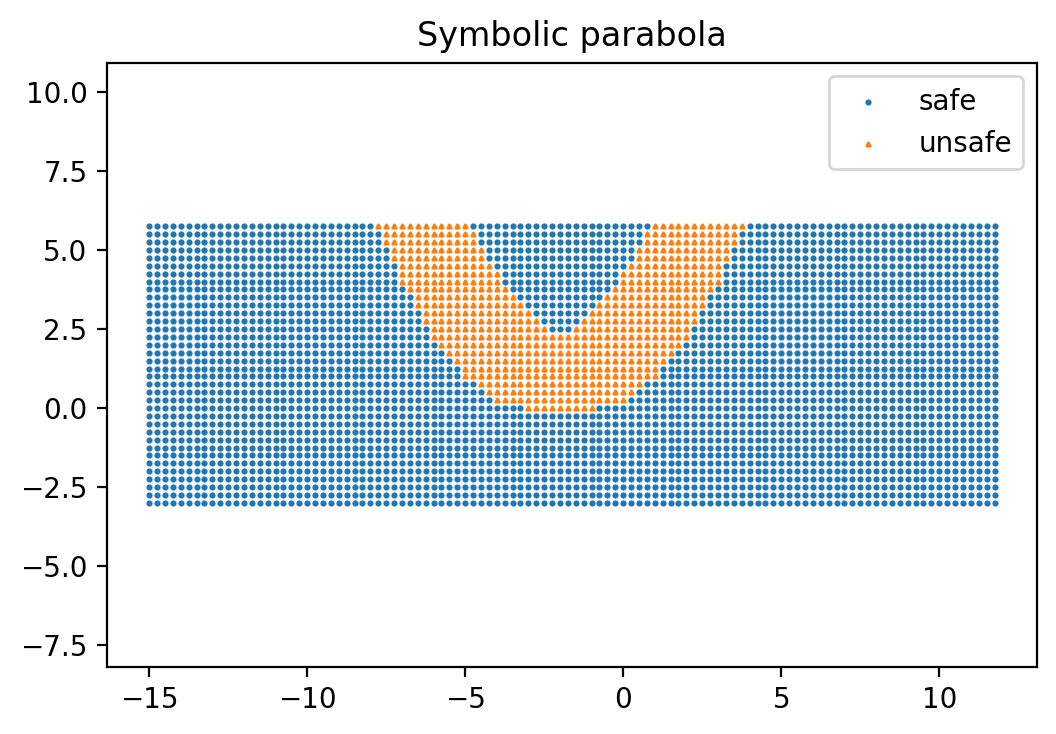

In [28]:
plot_condition(x, y, cond.subs(a, 1/4).subs(b, 1).subs(c, 2), xbounds, ybounds, title=example_name)

In [69]:
t0 = time.time()
cond = compute_unsafe_cond_symbolic(
    x,
    y,
    square_num,
    traj.subs(b, 1).subs(c, 1).subs(a, 2),
    Reals,
    add_notches=True,
)
print(f"{time.time() - t0}")

0.051338911056518555


In [67]:
t0 = time.time()
cond = compute_unsafe_cond_symbolic(
    x,
    y,
    square_param,
    traj,
    Reals,
    add_notches=True,
)
print(f"{time.time() - t0}")
cond

0.16170072555541992


                                                                                                        
⎛               ⎛         ⎛⎧                2                            ⎞⎞ ⎛        ⎛⎧               2 
⎜               ⎜         ⎜⎪               b                           b ⎟⎟ ⎜        ⎜⎪              b  
⎜          b    ⎜         ⎜⎪          c - ───             for w - x > ───⎟⎟ ⎜        ⎜⎪         c - ─── 
⎜x ≥ -w - ─── ∧ ⎜-w + y - ⎜⎨              4⋅a                         2⋅a⎟⎟⋅⎜w + y - ⎜⎨             4⋅a 
⎜         2⋅a   ⎜         ⎜⎪                                             ⎟⎟ ⎜        ⎜⎪                 
⎜               ⎜         ⎜⎪          2                                  ⎟⎟ ⎜        ⎜⎪         2       
⎝               ⎝         ⎝⎩a⋅(-w + x)  + b⋅(-w + x) + c  for w - x ≥ -∞ ⎠⎠ ⎝        ⎝⎩a⋅(w + x)  + b⋅(w
                                                                                                        

                                                      

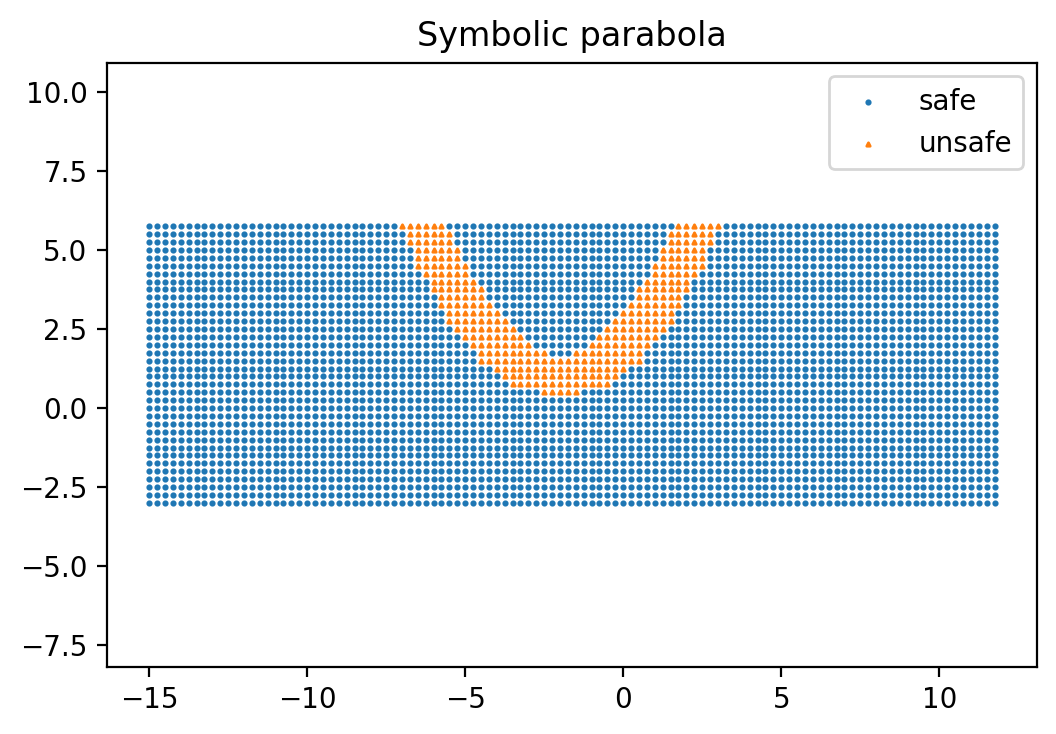

In [30]:
plot_condition(x, y, cond.subs(a, 1/4).subs(b, 1).subs(c, 2).subs(w, 0.5), xbounds, ybounds, title=example_name)

# ACAS X Piecewise Example (works)

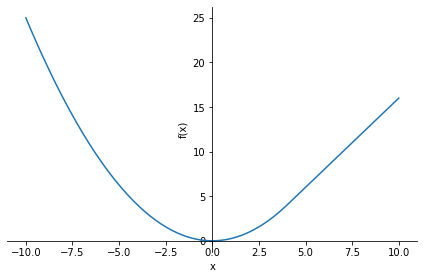

⎧           2                    
⎪        c⋅x            for b > x
⎨                                
⎪ 2                              
⎩b ⋅c + 2⋅b⋅c⋅(-b + x)  otherwise

In [104]:
c = Symbol("c", real=True, nonzero=True) # curvature
b = Symbol('b', real=True, positive=True) # boundary
# b = Symbol('b', real=True) # boundary

traj_piecewise = Piecewise(
                    (c*x**2, x < b),
                    (2*b*c*(x-b) + b**2*c, x >= b),
                )
plot(traj_piecewise.subs(c, 0.25).subs(b, 4))
traj_piecewise

In [103]:
domain = Interval(-12, 9)
xbounds = [-10, 10]
ybounds = [-4, 10]
example_name = "symbolic ACAS X"

In [86]:
piecewise_intervals = [Interval(-oo, b), Interval(b, oo)]
piecewise_intervals

In [87]:
cond = compute_unsafe_cond_symbolic(
    x,
    y,
    square_num,
    traj_piecewise,
    Reals,
    add_notches=True,
    intervals = piecewise_intervals # NOTE: new 
)
cond

                                                                                                        
⎛            ⎛    ⎛⎧           2                            ⎞    ⎞ ⎛    ⎛⎧           2                  
⎜            ⎜    ⎜⎪          b ⋅c             for b > x - 1⎟    ⎟ ⎜    ⎜⎪          b ⋅c             for
⎜x ≥ b - 1 ∧ ⎜y - ⎜⎨                                        ⎟ - 1⎟⋅⎜y - ⎜⎨                              
⎜            ⎜    ⎜⎪ 2                                      ⎟    ⎟ ⎜    ⎜⎪ 2                            
⎝            ⎝    ⎝⎩b ⋅c + 2⋅b⋅c⋅(-b + x - 1)    for x ≤ ∞  ⎠    ⎠ ⎝    ⎝⎩b ⋅c + 2⋅b⋅c⋅(-b + x + 1)    f
                                                                                                        

                                                                                                        
          ⎞    ⎞    ⎞   ⎛            ⎛    ⎛⎧           2                            ⎞    ⎞ ⎛    ⎛⎧      
 b > x + 1⎟    ⎟    ⎟   ⎜            ⎜    ⎜⎪          

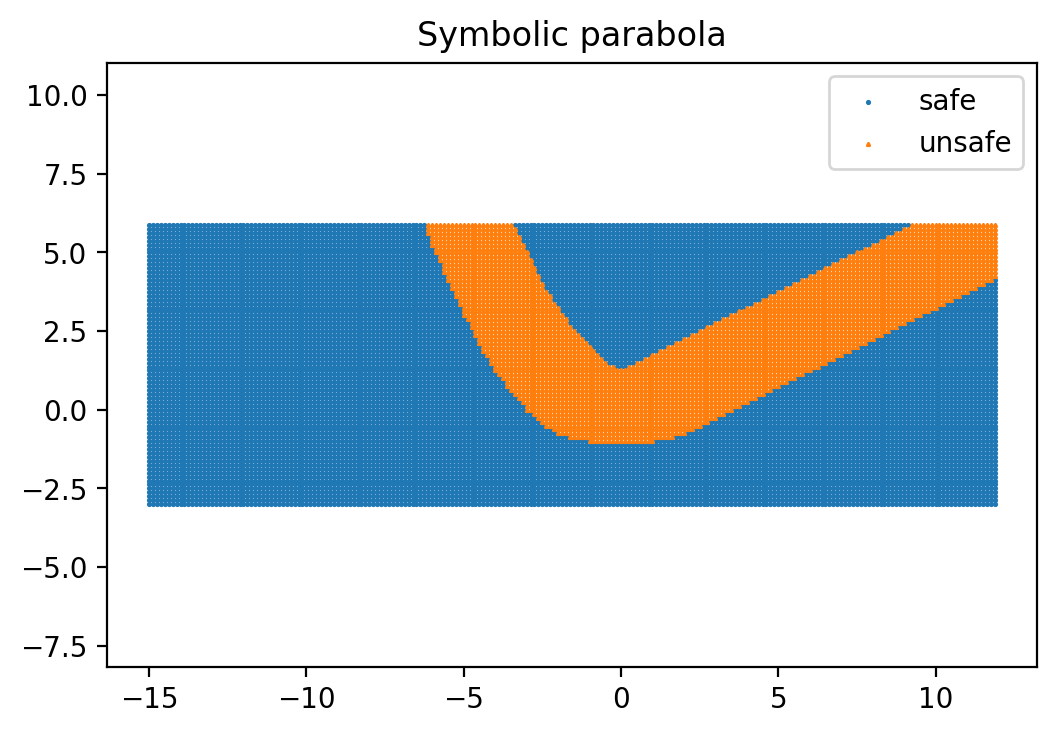

In [38]:
plot_condition(x, y, cond.subs(c, 0.25).subs(b, 1), xbounds, ybounds, title=example_name, resolution = 0.125)

In [39]:
cond = compute_unsafe_cond_symbolic(
    x,
    y,
    square_param,
    traj_piecewise,
    Reals,
    add_notches=True,
    intervals = piecewise_intervals # NOTE: new 
)
cond

                                                                                                        
⎛            ⎛         ⎛⎧           2                             ⎞⎞ ⎛        ⎛⎧           2            
⎜            ⎜         ⎜⎪          b ⋅c             for b > -w + x⎟⎟ ⎜        ⎜⎪          b ⋅c          
⎜x ≥ b - w ∧ ⎜-w + y - ⎜⎨                                         ⎟⎟⋅⎜w + y - ⎜⎨                        
⎜            ⎜         ⎜⎪ 2                                       ⎟⎟ ⎜        ⎜⎪ 2                      
⎝            ⎝         ⎝⎩b ⋅c + 2⋅b⋅c⋅(-b - w + x)  for w - x ≥ -∞⎠⎠ ⎝        ⎝⎩b ⋅c + 2⋅b⋅c⋅(-b + w + x
                                                                                                        

                                                                                                        
                ⎞⎞    ⎞   ⎛            ⎛         ⎛⎧           2                            ⎞⎞ ⎛        ⎛
   for b > w + x⎟⎟    ⎟   ⎜            ⎜         ⎜⎪   

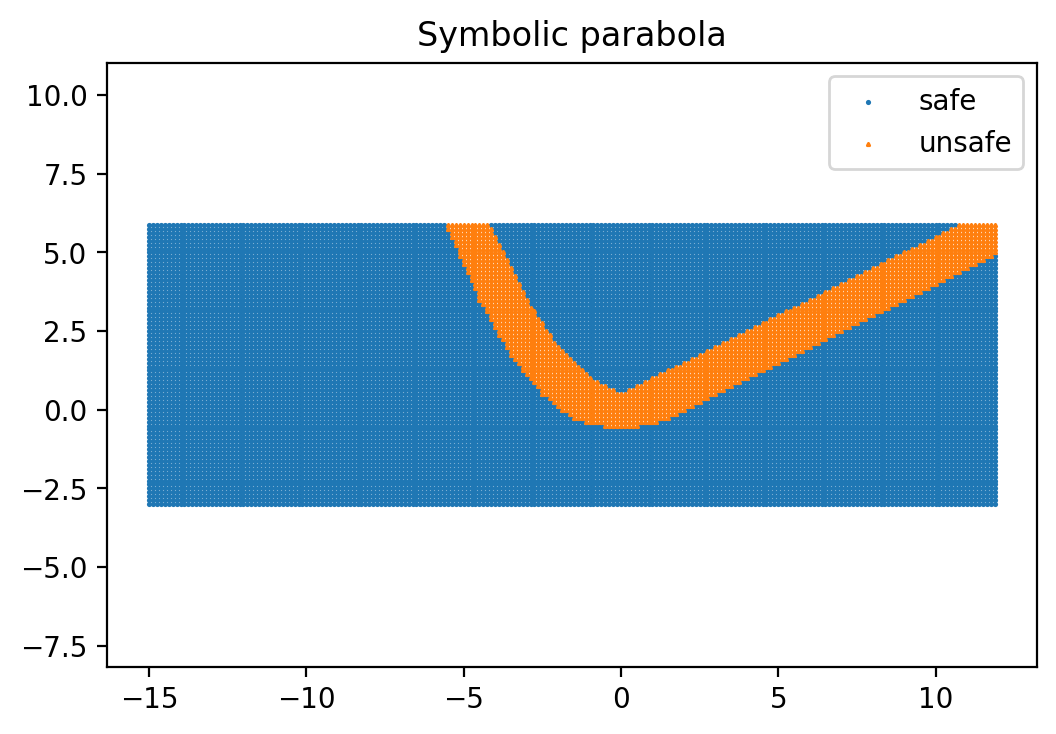

In [40]:
plot_condition(x, y, cond.subs(c, 0.25).subs(b, 1).subs(w, 0.5), xbounds, ybounds, title=example_name, resolution = 0.125)

# UAV Piecewise Example (sorting fails)

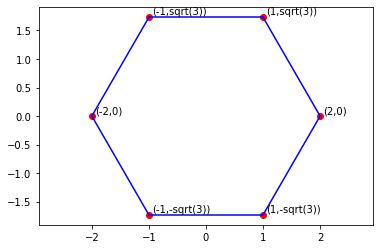

In [47]:
rp = 2
hexagon = RegularPolygon(Point(0, 0), rp, 6)

plot_polygon(hexagon)

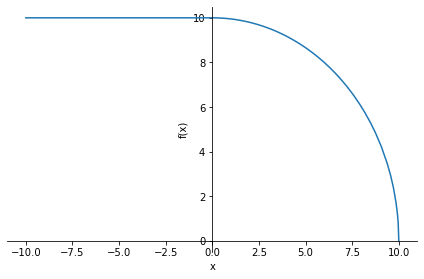

⎧         _________                                
⎪        ╱  2    2                        R        
⎪      ╲╱  R  - x          for x > ────────────────
⎪                                     _____________
⎪                                    ╱    2        
⎨                                  ╲╱  tan (θ) + 1 
⎪                                                  
⎪           -R⋅cos(θ) + x                          
⎪R⋅sin(θ) - ─────────────         otherwise        
⎪               tan(θ)                             
⎩                                                  

In [99]:
R = Symbol("R", real=True, positive=True, nonzero=True) 
theta = Symbol('theta', real=True, positive=True, nonzero=True)
bound = R / sqrt(tan(theta)**2 + 1)

traj_piecewise = Piecewise(
                    (sqrt(R**2 - x**2), x > bound),
                    (-1/tan(theta)*(x-R*cos(theta)) + R*sin(theta), x <= bound))
plot(traj_piecewise.subs(R, 10).subs(theta, pi/2))
traj_piecewise

In [50]:
example_name = "Top-Down UAV Trajectory"

cond = compute_unsafe_cond_symbolic(
    x, y,
    hexagon,
    traj_piecewise,
    domain = Reals, 
    intervals = [Interval(bound, R), Interval(-oo, bound)]
)
cond
# NOTE: transition points at [0] are fake - they come from the wrong function

Failed to sort transition points, which were {Transition(0, R), Boundary(R, 0), Transition(sqrt(3)*R/2, R/2), Transition(-sqrt(3)*R/2, R/2), Boundary(R/sqrt(tan(theta)**2 + 1), sqrt(R**2 - R**2/(tan(theta)**2 + 1))), Boundary(R/sqrt(tan(theta)**2 + 1), R*sin(theta) - (-R*cos(theta) + R/sqrt(tan(theta)**2 + 1))/tan(theta)), Boundary(-oo, R*sin(theta) + oo/tan(theta))}
TypeError: cannot determine truth value of Relational
